In [1]:
import charset_normalizer

print("charset-normalizer version:", charset_normalizer.__version__)

charset-normalizer version: 2.1.1


In [2]:
from ultralytics import YOLO

print("Ultralytics import OK")

WARNING ⚠️ torchvision==0.17 is incompatible with torch==2.3.
Run 'pip install torchvision==0.18' to fix torchvision or 'pip install -U torch torchvision' to update both.
For a full compatibility table see https://github.com/pytorch/vision#installation
Ultralytics import OK


In [3]:
import torch
import cv2
from pathlib import Path

In [ ]:
print("🧪 PyTorch CUDA available:", torch.cuda.is_available())
print("📷 OpenCV version:", cv2.__version__)

🧪 PyTorch CUDA available: True
📷 OpenCV version: 4.10.0


In [ ]:
INTERIM = Path("../data") / "interim"
PROCESSED = Path("../data") / "processed"
PROJECT = "models"
RUN_NAME = "emotion_detector"
DATA_FILE = "data.yaml"  # you will update this to processed below

In [ ]:
import shutil

splits = ["train", "valid", "test"]
for split in splits:
    src_lbl = INTERIM / split / "labels"
    dst_lbl = PROCESSED / split / "labels"
    dst_lbl.mkdir(parents=True, exist_ok=True)
    for txt in src_lbl.glob("*.txt"):
        shutil.copy(txt, dst_lbl / txt.name)
print("✅ Labels copied from interim → processed.")

✅ Labels copied from interim → processed.


In [14]:
# Load and inspect YOLOv8n
model = YOLO("yolov8n.pt")
model.info()

YOLOv8n summary: 225 layers, 3,157,200 parameters, 0 gradients


(225, 3157200, 0, 0.0)

In [ ]:
results = model.train(
    data=DATA_FILE,  # now pointing at processed images/labels
    epochs=50,
    batch=16,
    imgsz=640,
    half=True,
    project=PROJECT,
    name=RUN_NAME,
    exist_ok=True,
)
print("✅ Training complete. Check:", Path(PROJECT) / RUN_NAME)

New https://pypi.org/project/ultralytics/8.3.133 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.43  Python-3.8.20 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 2060, 6144MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=models, name=emotion_detector, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=True, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=

100%|██████████| 755k/755k [00:00<00:00, 14.9MB/s]

Overriding model.yaml nc=80 with nc=9

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 225 layers, 3,012,603 parameters, 3,012,587 gradients

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 37.2MB/s]


AMP: checks passed 


train: Scanning C:\Users\mrosk\OneDrive\Desktop\emotion-detection-yolo\data\processed\train\labels... 44449 images, 0 backgrounds, 0 corrupt: 100%|██████████| 44449/44449 [01:56<00:00, 382.36it/s]


train: New cache created: C:\Users\mrosk\OneDrive\Desktop\emotion-detection-yolo\data\processed\train\labels.cache


val: Scanning C:\Users\mrosk\OneDrive\Desktop\emotion-detection-yolo\data\processed\valid\labels... 1191 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1191/1191 [00:04<00:00, 265.03it/s]


val: New cache created: C:\Users\mrosk\OneDrive\Desktop\emotion-detection-yolo\data\processed\valid\labels.cache


c:\Users\mrosk\anaconda3\envs\yolo38\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Plotting labels to models\emotion_detector\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to models\emotion_detector
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.36G      1.241      3.025      1.708          2        640: 100%|██████████| 2779/2779 [08:25<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  3.94it/s]


                   all       1191       1191      0.368      0.354      0.251      0.153

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.36G      1.188      2.267      1.627          4        640: 100%|██████████| 2779/2779 [08:07<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.62it/s]

                   all       1191       1191       0.47      0.423      0.363      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.37G       1.22      2.037      1.646          1        640: 100%|██████████| 2779/2779 [07:48<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.71it/s]

                   all       1191       1191      0.448      0.436      0.382      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.37G      1.214       1.93      1.637          1        640: 100%|██████████| 2779/2779 [07:47<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.66it/s]

                   all       1191       1191      0.535       0.42      0.438      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.36G       1.16      1.794      1.592          2        640: 100%|██████████| 2779/2779 [08:09<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  3.91it/s]

                   all       1191       1191      0.571      0.484      0.497      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.37G      1.132       1.71      1.571          3        640: 100%|██████████| 2779/2779 [07:50<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.51it/s]

                   all       1191       1191      0.587      0.518      0.524      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.34G      1.109      1.642      1.552          2        640: 100%|██████████| 2779/2779 [07:39<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.48it/s]

                   all       1191       1191      0.522       0.54      0.554      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.35G      1.089      1.607      1.536          2        640: 100%|██████████| 2779/2779 [08:45<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.63it/s]

                   all       1191       1191      0.598      0.532       0.58      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.34G      1.079      1.565      1.528          4        640: 100%|██████████| 2779/2779 [07:34<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.10it/s]

                   all       1191       1191      0.594       0.55      0.596      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.37G      1.073      1.545      1.522          2        640: 100%|██████████| 2779/2779 [07:54<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.73it/s]

                   all       1191       1191      0.598       0.58      0.606      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.35G      1.061      1.514      1.513          2        640: 100%|██████████| 2779/2779 [08:08<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.76it/s]

                   all       1191       1191      0.607      0.565      0.614      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.35G      1.054      1.497      1.508          4        640: 100%|██████████| 2779/2779 [08:19<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.62it/s]

                   all       1191       1191      0.607      0.582       0.63      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.34G      1.045       1.47      1.499          2        640: 100%|██████████| 2779/2779 [08:11<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:11<00:00,  3.38it/s]

                   all       1191       1191      0.633      0.599      0.637      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.37G      1.033      1.454      1.494          3        640: 100%|██████████| 2779/2779 [07:46<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.74it/s]

                   all       1191       1191       0.68      0.569      0.645      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.34G      1.033      1.441      1.489          1        640: 100%|██████████| 2779/2779 [07:53<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.05it/s]

                   all       1191       1191      0.629      0.609      0.644      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.35G      1.027      1.426      1.486          2        640: 100%|██████████| 2779/2779 [07:46<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  3.83it/s]

                   all       1191       1191      0.627      0.603      0.646      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.34G      1.018      1.413      1.481          4        640: 100%|██████████| 2779/2779 [07:26<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:08<00:00,  4.24it/s]

                   all       1191       1191      0.676      0.576      0.652      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.37G      1.016      1.394      1.479          1        640: 100%|██████████| 2779/2779 [07:21<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:11<00:00,  3.39it/s]

                   all       1191       1191      0.667      0.592      0.658      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.34G      1.009      1.376      1.473          1        640: 100%|██████████| 2779/2779 [08:23<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.66it/s]

                   all       1191       1191      0.701      0.575      0.663      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.35G      1.008      1.375      1.472          4        640: 100%|██████████| 2779/2779 [08:37<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:11<00:00,  3.27it/s]

                   all       1191       1191       0.66      0.615       0.67      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.34G      1.005      1.362      1.469          3        640: 100%|██████████| 2779/2779 [10:56<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:12<00:00,  3.05it/s]

                   all       1191       1191      0.688      0.594      0.672      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.37G      0.997      1.353      1.464          2        640: 100%|██████████| 2779/2779 [11:17<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:15<00:00,  2.44it/s]

                   all       1191       1191      0.677      0.599      0.674      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.34G     0.9921      1.341      1.462          2        640: 100%|██████████| 2779/2779 [13:28<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:18<00:00,  2.00it/s]


                   all       1191       1191      0.669      0.613      0.675      0.485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.35G     0.9887      1.335      1.458          2        640: 100%|██████████| 2779/2779 [13:38<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:20<00:00,  1.82it/s]


                   all       1191       1191      0.681      0.598      0.676      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.34G     0.9817      1.324      1.455          3        640: 100%|██████████| 2779/2779 [12:56<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:15<00:00,  2.50it/s]

                   all       1191       1191      0.679      0.606      0.678      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.37G     0.9816      1.312      1.453          3        640: 100%|██████████| 2779/2779 [12:50<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:19<00:00,  2.00it/s]

                   all       1191       1191      0.676      0.611      0.678       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.34G     0.9811      1.317      1.452          2        640: 100%|██████████| 2779/2779 [13:03<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:18<00:00,  2.10it/s]

                   all       1191       1191      0.686      0.604      0.679      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.35G     0.9749      1.304       1.45          2        640: 100%|██████████| 2779/2779 [09:35<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.77it/s]

                   all       1191       1191      0.696      0.593      0.681      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.34G     0.9696      1.291      1.444          4        640: 100%|██████████| 2779/2779 [07:40<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.71it/s]

                   all       1191       1191       0.69      0.601      0.682      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.37G     0.9702      1.289      1.444          4        640: 100%|██████████| 2779/2779 [07:36<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.73it/s]

                   all       1191       1191      0.687      0.613      0.683      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.35G     0.9649      1.267      1.439          4        640: 100%|██████████| 2779/2779 [07:38<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.79it/s]

                   all       1191       1191      0.684       0.61      0.685      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.35G      0.962      1.265      1.438          3        640: 100%|██████████| 2779/2779 [07:37<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.73it/s]

                   all       1191       1191      0.667      0.623      0.686      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.34G     0.9551      1.253      1.435          2        640: 100%|██████████| 2779/2779 [07:38<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.75it/s]

                   all       1191       1191      0.667      0.624      0.687      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.37G     0.9508       1.24      1.431          1        640: 100%|██████████| 2779/2779 [07:36<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.72it/s]

                   all       1191       1191       0.67      0.624      0.688      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.35G     0.9531       1.24      1.431          2        640: 100%|██████████| 2779/2779 [07:45<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.70it/s]

                   all       1191       1191      0.675      0.624      0.689      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.35G      0.942      1.226      1.425          2        640: 100%|██████████| 2779/2779 [08:04<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:11<00:00,  3.44it/s]

                   all       1191       1191      0.677      0.625      0.691      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.34G       0.94      1.226      1.424          2        640: 100%|██████████| 2779/2779 [07:45<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.13it/s]

                   all       1191       1191      0.675      0.627      0.691      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.37G     0.9345      1.215      1.419          1        640: 100%|██████████| 2779/2779 [07:33<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.12it/s]

                   all       1191       1191      0.676      0.628      0.693        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.35G     0.9292      1.203      1.417          2        640: 100%|██████████| 2779/2779 [07:48<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  3.95it/s]

                   all       1191       1191      0.677      0.629      0.694      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.35G     0.9343      1.201      1.417          4        640: 100%|██████████| 2779/2779 [07:46<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.76it/s]

                   all       1191       1191      0.678      0.629      0.695      0.502


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.33G       1.02     0.9733      1.685          1        640: 100%|██████████| 2779/2779 [07:33<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  4.12it/s]

                   all       1191       1191      0.673      0.637      0.697      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.35G      1.004     0.9407      1.668          1        640: 100%|██████████| 2779/2779 [07:40<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  3.81it/s]

                   all       1191       1191      0.666      0.652      0.699      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.34G     0.9916     0.9263      1.656          1        640: 100%|██████████| 2779/2779 [07:40<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.79it/s]

                   all       1191       1191      0.666      0.649        0.7      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.34G     0.9834     0.9084      1.648          1        640: 100%|██████████| 2779/2779 [07:37<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  3.86it/s]

                   all       1191       1191      0.712      0.616      0.703      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.34G     0.9757      0.893       1.64          1        640: 100%|██████████| 2779/2779 [07:49<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.62it/s]

                   all       1191       1191      0.688      0.643      0.704      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.34G     0.9647     0.8764      1.631          1        640: 100%|██████████| 2779/2779 [07:49<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.47it/s]

                   all       1191       1191      0.717      0.614      0.705       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.34G     0.9604     0.8614      1.625          1        640: 100%|██████████| 2779/2779 [07:49<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.58it/s]

                   all       1191       1191      0.715       0.62      0.708      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.34G     0.9517     0.8473      1.618          1        640: 100%|██████████| 2779/2779 [07:49<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.56it/s]

                   all       1191       1191      0.721      0.618      0.711      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.33G     0.9399     0.8362      1.605          1        640: 100%|██████████| 2779/2779 [07:48<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.62it/s]

                   all       1191       1191      0.723      0.618      0.712      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.34G     0.9377     0.8233      1.603          1        640: 100%|██████████| 2779/2779 [07:50<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.52it/s]

                   all       1191       1191      0.722      0.619      0.714      0.518



50 epochs completed in 7.310 hours.
Optimizer stripped from models\emotion_detector\weights\last.pt, 6.3MB
Optimizer stripped from models\emotion_detector\weights\best.pt, 6.3MB

Validating models\emotion_detector\weights\best.pt...
Ultralytics 8.3.43  Python-3.8.20 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 2060, 6144MiB)
Model summary (fused): 168 layers, 3,007,403 parameters, 0 gradients


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:11<00:00,  3.36it/s]


                   all       1191       1191      0.722       0.62      0.714      0.518
                 angry        164        164      0.688      0.551      0.703      0.502
              contempt         78         78      0.602       0.66      0.723      0.541
               disgust         95         95       0.75      0.747      0.835      0.697
                  fear         74         74      0.732      0.757      0.817       0.64
                 happy        257        257      0.877      0.716      0.858      0.593
               natural        121        121      0.599      0.562      0.665      0.421
                   sad        217        217      0.738      0.604      0.747      0.507
                sleepy         21         21       0.77      0.333       0.33      0.199
             surprised        164        164      0.741      0.646      0.749      0.562
Speed: 0.2ms preprocess, 1.9ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to models\emot

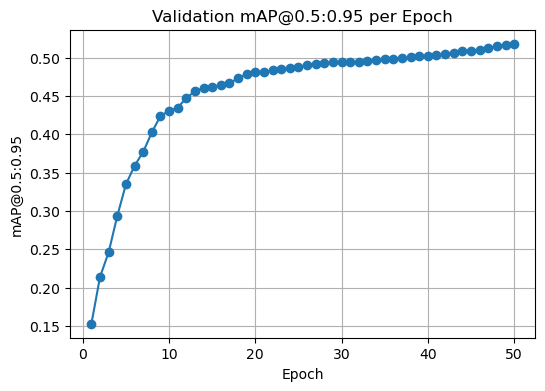

In [ ]:
%matplotlib inline
# Cell 4: Plot validation mAP over epochs
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

res_csv = Path(PROJECT) / RUN_NAME / "results.csv"
if not res_csv.exists():
    res_csv = next((Path(PROJECT) / RUN_NAME).rglob("results.csv"))

df = pd.read_csv(res_csv)
plt.figure(figsize=(6, 4))
plt.plot(df.index + 1, df["metrics/mAP50-95(B)"], marker="o")
plt.title("Validation mAP@0.5:0.95 per Epoch")
plt.xlabel("Epoch")
plt.ylabel("mAP@0.5:0.95")
plt.grid(True)
plt.show()


In [ ]:
df  # Cell 6: Evaluate best.pt on the held-out test set
metrics_test = model.val(data=DATA_FILE, split="test")
print("📊 Test set metrics:", metrics_test)


Ultralytics 8.3.43  Python-3.8.20 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 2060, 6144MiB)
Model summary (fused): 168 layers, 3,007,403 parameters, 0 gradients


val: Scanning C:\Users\mrosk\OneDrive\Desktop\emotion-detection-yolo\data\processed\test\labels... 1164 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1164/1164 [00:03<00:00, 371.35it/s]


val: New cache created: C:\Users\mrosk\OneDrive\Desktop\emotion-detection-yolo\data\processed\test\labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 73/73 [00:12<00:00,  5.81it/s]


                   all       1164       1164      0.669      0.701      0.722      0.523
                 angry        183        183      0.694      0.678      0.733      0.543
              contempt         64         64      0.675      0.875      0.826      0.575
               disgust         86         86      0.636      0.779        0.8      0.657
                  fear        108        108      0.727      0.861       0.87      0.664
                 happy        264        264      0.869      0.697      0.788      0.578
               natural         98         98      0.541      0.582      0.649      0.426
                   sad        191        191      0.684      0.613       0.68      0.452
                sleepy         17         17      0.527      0.524      0.402      0.237
             surprised        153        153       0.67      0.699      0.748      0.574
Speed: 0.3ms preprocess, 2.3ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to models\emot